In [39]:
from eolearn.core import EOPatch
import numpy as np
import sys

In [40]:
sys.path.insert(1,'../functions')
import io_pipe
import nd_index
import lst
import plot_utils
from matplotlib import pyplot as plt

In [41]:
# Read eopatch as eodata
eopatch = EOPatch.load('../data/ld8_example')

In [42]:
eopatch

EOPatch(
  data: {
    L1C_data: numpy.ndarray(shape=(1, 1082, 1312, 12), dtype=float32)
  }
  mask: {
    dataMask: numpy.ndarray(shape=(1, 1082, 1312, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.8
    service_type: 'processing'
    size_x: 1312
    size_y: 1082
    time_difference: datetime.timedelta(seconds=7200)
    time_interval: ('2020-04-01T00:00:00', '2020-04-08T23:59:59')
  }
  bbox: BBox(((11.36078, 48.061602), (11.722878, 48.24822)), crs=CRS('4326'))
  timestamp: [datetime.datetime(2020, 4, 7, 10, 3, 24)]
)

### Calculate NDVI

In [43]:
eopatch_data = eopatch.data['L1C_data']

In [44]:
NDVI_REF = nd_index.calc_ndvi(eopatch_data)

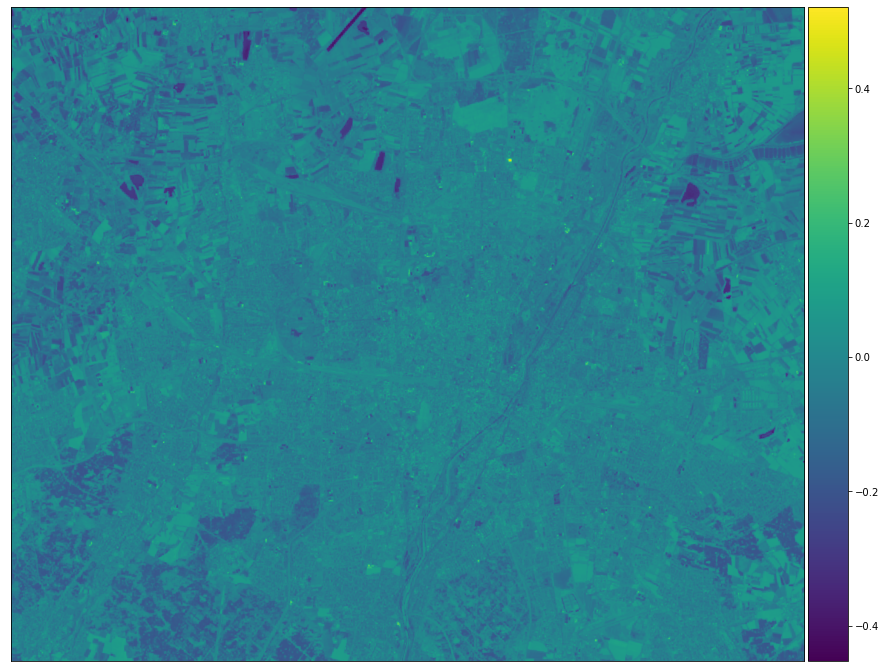

In [45]:
plot_utils.plot_ndi(NDVI_REF[0])

In [46]:
B10 = eopatch_data[0,:,:,9]
RADIANCE_ADD_BAND_10 = 0.10000
RADIANCE_MULT_BAND_10 = 3.3420E-04
K1_CONSTANT_BAND_10 = 774.8553
K2_CONSTANT_BAND_10 = 1321.0789

In [47]:
band10_temp = lst.BrightnessTemp(B10,RADIANCE_ADD_BAND_10,RADIANCE_MULT_BAND_10,
                             K1_CONSTANT_BAND_10,K2_CONSTANT_BAND_10)
vLSE = lst.LSE(NDVI_REF[0])
vLST = lst.mono_LST(band10_temp,vLSE)

In [48]:
plt.rcParams['figure.figsize'] = [12, 8]

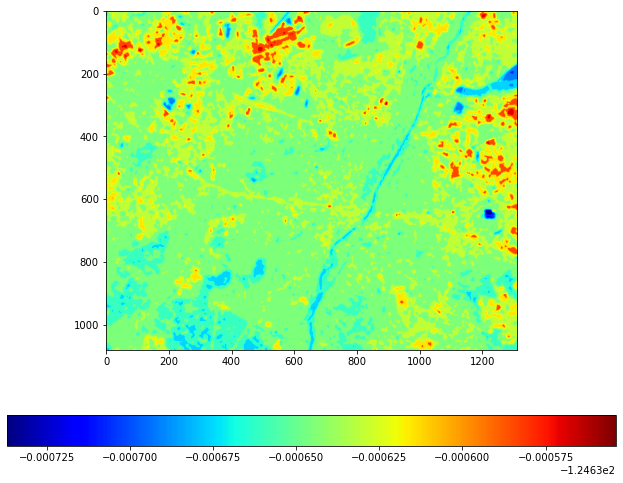

In [49]:
f, ax = plt.subplots(1,1)
im = ax.imshow(vLST,cmap=plt.cm.jet)
f.colorbar(im,orientation="horizontal",fraction=0.07)
plt.show()